## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Import Dataset

In [2]:
clean_df = pd.read_csv('clean_resume_data.csv')
#resume = pd.read_csv('Resume.csv')

clean_df.sample(10)

,ID,Category,Feature
183,19195747,DESIGNER,kichen bath designer sales professional summar...
1286,56952849,DIGITAL-MEDIA,media administrator summary experienced admini...
55,30862904,HR,hr manager highlights senior human resources s...
288,52618188,INFORMATION-TECHNOLOGY,information technology help desk specialist hi...
41,59962788,HR,hr executive professional summary forward thin...
363,23939133,TEACHER,teacher summary child care professional backgr...
1290,26160200,DIGITAL-MEDIA,vice president director client services digita...
23,12786012,HR,hr coordinator summary certified human resourc...
2289,32318506,ARTS,rda professional summary dependable hardworkin...
1450,30826569,CHEF,lecturer chef instructor researcher recruiter ...


## Exploratory Data Analysis

In [3]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2484 non-null   int64 
 1   Category  2484 non-null   object
 2   Feature   2483 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.3+ KB


In [4]:
# Check null values

clean_df.isna().sum()

ID          0
Category    0
Feature     1
dtype: int64

In [5]:
# Drop null values
clean_df = clean_df.dropna()

clean_df.isna().sum()

ID          0
Category    0
Feature     0
dtype: int64

In [6]:
# Check duplicate values

clean_df.duplicated().sum()

0

In [7]:
# Check the shape of dataset

clean_df.shape

(2483, 3)

In [8]:
# Check value counts for each category

clean_df['Category'].value_counts()

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      119
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

### Visualization

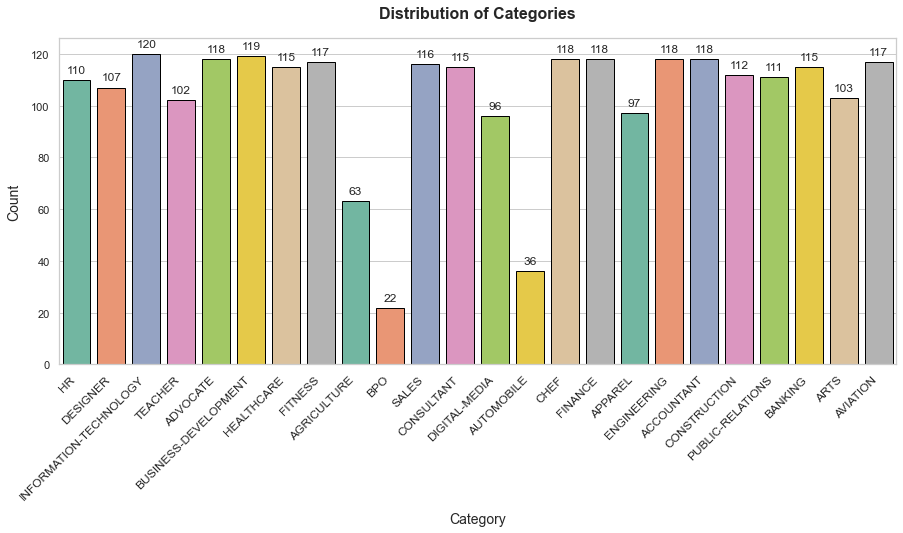

In [9]:
# Set a style for the plot
sns.set_theme(style="whitegrid")

# Set the color palette
palette = sns.color_palette("Set2")  

# Increase figure size for clarity
plt.figure(figsize=(15, 6))

# Create the countplot with custom palette and edge colors
sns.countplot(data=clean_df, x='Category', palette=palette, edgecolor='black')

# Rotate x-axis labels and adjust their alignment
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add labels and title
plt.xlabel("Category", fontsize=14, labelpad=10)
plt.ylabel("Count", fontsize=14, labelpad=10)
plt.title("Distribution of Categories", fontsize=16, weight='bold', pad=20)

# Display the value on top of each bar for clarity
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Show the plot with enhanced aesthetics
plt.show()


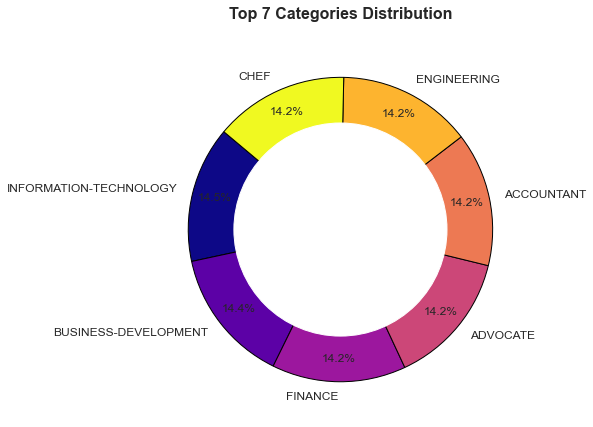

In [10]:
# Top 7 categories and their counts
top_categories = clean_df['Category'].value_counts().nlargest(7)
counts = top_categories.values
labels = top_categories.index

# Set up the figure size
plt.figure(figsize=(10, 7))

# Create the pie chart
plt.pie(counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,           # Starting angle for a better layout
        colors=plt.cm.plasma(np.linspace(0, 1, 7)),  # Using plasma colormap for distinct colors
        wedgeprops={'edgecolor': 'black'},  # Add a black edge to each slice
        pctdistance=0.85,  # Adjusts the percentage label position
        textprops={'fontsize': 12})  # Increases font size for better readability

# Draw a center circle to make it a donut chart (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title
plt.title("Top 7 Categories Distribution", fontsize=16, weight='bold', pad=20)

# Display the pie chart
plt.show()


## Balance the Dataset 

In [11]:
from sklearn.utils import resample

# Define the maximum count among all categories
max_count = clean_df['Category'].value_counts().max()

# Resample each category to match the maximum count
balanced_data = []
for category in clean_df['Category'].unique():
    category_data = clean_df[clean_df['Category'] == category]
    if len(category_data) < max_count:
        # Perform oversampling for categories with fewer samples
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
        # Perform undersampling for categories with more samples
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)

# Concatenate the balanced data for all categories
balanced_df = pd.concat(balanced_data)

In [12]:
balanced_df['Category'].value_counts()

HR                        120
DESIGNER                  120
ARTS                      120
BANKING                   120
PUBLIC-RELATIONS          120
CONSTRUCTION              120
ACCOUNTANT                120
ENGINEERING               120
APPAREL                   120
FINANCE                   120
CHEF                      120
AUTOMOBILE                120
DIGITAL-MEDIA             120
CONSULTANT                120
SALES                     120
BPO                       120
AGRICULTURE               120
FITNESS                   120
HEALTHCARE                120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
TEACHER                   120
INFORMATION-TECHNOLOGY    120
AVIATION                  120
Name: Category, dtype: int64

In [13]:
balanced_df.isnull().sum()

ID          0
Category    0
Feature     0
dtype: int64

## Train - Test Split

In [14]:
X = balanced_df['Feature']
y = balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Encoding: (TF-IDF)

In [15]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Train - Random Forest Classifier

In [16]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [17]:
# Accuracy 
from sklearn.metrics import classification_report

y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))

Accuracy: 0.8628472222222222
                        precision    recall  f1-score   support

            ACCOUNTANT       0.90      0.95      0.93        20
              ADVOCATE       0.88      0.79      0.84        29
           AGRICULTURE       0.95      0.91      0.93        23
               APPAREL       0.79      0.68      0.73        22
                  ARTS       1.00      0.67      0.80        24
            AUTOMOBILE       1.00      0.84      0.91        19
              AVIATION       0.97      1.00      0.98        28
               BANKING       0.88      0.68      0.77        22
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.65      0.83      0.73        18
                  CHEF       0.87      0.96      0.92        28
          CONSTRUCTION       0.81      1.00      0.89        25
            CONSULTANT       1.00      0.74      0.85        31
              DESIGNER       0.89      0.86      0.87        28
         D

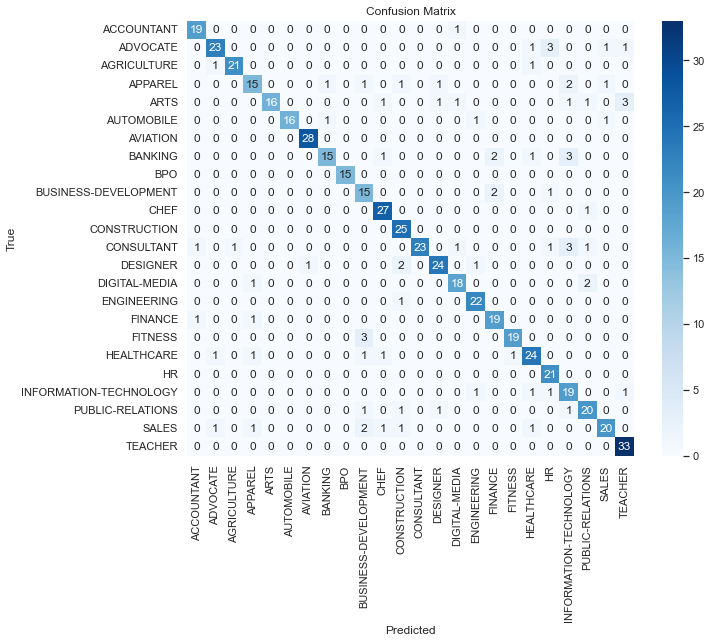

In [18]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Predictive System

In [19]:
# Clean resume
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

# Prediction and Category Name
def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [20]:
# Example-1

resume_file='information technology manager network engineer professional overview highly skilled accomplished information technology manager years expertise planning implementing streamlining systems ensure maximum customer satisfaction business revenue strong leader demonstrated ability work effectively individuals levels functional areas exceptional communication project management skills ability successfully manage multiple priorities assignments skills platforms windows server professional windows xp pro home win dos citrix ica ms exchange hardware hp ibm dell intel based server desktop platforms cisco switches sonic wall hardware vpns hp laser jets toshiba e color copier toshiba sony laptops inter tel software ms office visio citrix metaframe xp symantec pc anywhere ghost antivirus utilities win fax mcafee virus scan adobe acrobat illustrator photoshop partition magic adware spyware networking tcp ip wireless b g dns wins dhcp relevant experience information technology manager network engineer feb current company name city state responsible day day operations functions wilkes six offices staff members currently lead team professionals developers planning upgrades implementation systems business applications development new software tools work closely cio senior management ensure business technology objectives aligned researched new technologies calculated future needs achieve accurate capacity planning negotiated hardware software purchases maintenance contracts dramatically reduced costs maintenance virtualizing company infrastructure using vmware reduced physical servers streamlined disaster recovery processes planned executed active directory domain migration r coordinated planning migration mpls network sites including upgrades routers switches network equipment increased speed reliability company email migrating microsoft exchange streamlined operations designing new citrix infrastructure using netscaler load balancers ensure better speed connectivity less downtime remote offices led planning implementation disaster recovery site atlanta created company first comprehensive business continuity plan tested success installed configuring barracuda spam virus firewalls resulting reduction spam enforced security policies managed monitored updated spam filtering virus malware prevention systems reduced desktop application deployment times designing implementing microsoft system center configuration manager conducted training internal systems local procedures technical subjects company employees coordinate external technology vendors internal staff members third party consultants network engineer sep jan company name city state administered managed windows server network environment responsible lan wan duties local remote networks acted technical consultant clients various projects provide end user support windows xp operating systems installed implemented exchange mail server implemented server desktop security using mcafee enterprise epolicy orchestrator installed configured web servers ftp servers pop mail servers manage cisco switches routers configured vpn remote access users implemented software domain policies patches upgrades using group policy sus trained new employees systems administration web development network support technician jan aug company name city provided network desktop support users provided technical support offices b domain supported help desk using help star software troubleshooting windows desktop computers implemented group policy objects control desktop environment security performed hardware software upgrades replacements performed installations troubleshooting ms office suite managed users computers organizational units active directory created disc images desktop notebook computers using norton ghost troubleshooting repairs laser printers copy machines education bachelor science management information systems university maryland university college city state certifications microsoft certified technology specialist mcts citrix certified administrator cca information systems management certificate project management certificate'

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: INFORMATION-TECHNOLOGY


In [21]:
#Example-2

resume_file = """Objective:
Dedicated and results-oriented Banking professional with a strong background in financial analysis and customer service seeking opportunities to contribute to a reputable financial institution. Eager to leverage expertise in risk management, investment strategies, and relationship building to drive business growth and client satisfaction.

Education:
- Bachelor of Business Administration in Finance, XYZ University, GPA: 3.8/4.0
- Certified Financial Analyst (CFA) Level I Candidate

Skills:
- Proficient in financial modeling and analysis using Excel, Bloomberg Terminal, and other financial software
- Extensive knowledge of banking products and services, including loans, mortgages, and investment products
- Strong understanding of regulatory compliance and risk management practices in the banking industry
- Excellent communication and interpersonal skills, with a focus on building rapport with clients and colleagues
- Ability to work efficiently under pressure and adapt to changing market conditions

Experience:
Financial Analyst | ABC Bank
- Conducted financial analysis and risk assessment for corporate clients, including credit analysis, financial statement analysis, and cash flow modeling
- Developed customized financial solutions to meet clients' needs and objectives, resulting in increased revenue and client retention
- Collaborated with cross-functional teams to identify new business opportunities and optimize existing processes

Customer Service Representative | DEF Bank
- Provided exceptional customer service to bank clients, addressing inquiries, resolving issues, and promoting banking products and services
- Processed transactions accurately and efficiently, including deposits, withdrawals, and account transfers
- Educated customers on various banking products and services, helping them make informed financial decisions

Internship | GHI Investments
- Assisted portfolio managers with investment research and analysis, including industry and company-specific research, financial modeling, and performance analysis
- Prepared investment presentations and reports for clients, highlighting investment opportunities and performance metrics
- Conducted market research and analysis to identify trends and opportunities in the financial markets

Certifications:
- Certified Financial Planner (CFP)
- Series 7 and Series 63 Securities Licenses

Languages:
- English (Native)
- Spanish (Proficient)

"""
predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: BANKING


In [22]:
# Example-3

resume_file = '''Objective:
Data Scientist with hands-on experience in machine learning, statistical analysis, and data visualization. Passionate about leveraging data insights to solve complex problems and support data-driven decision-making within innovative organizations.

Education:

Master of Science in Data Science, University of DEF, GPA: 3.9/4.0
Bachelor of Science in Statistics, XYZ University, GPA: 3.8/4.0
Skills:

Proficient in Python, R, SQL, and data visualization libraries (Matplotlib, Seaborn)
Experience with machine learning frameworks such as Scikit-Learn, TensorFlow, and PyTorch
Strong knowledge of statistical analysis, data mining, and predictive modeling
Skilled in data visualization and storytelling using tools like Tableau and Power BI
Familiar with Big Data technologies, including Hadoop and Spark
Experience:

Data Scientist | GHI Tech Solutions

Developed and optimized machine learning models to predict customer churn, improving retention strategies and increasing customer lifetime value
Collaborated with cross-functional teams to integrate data-driven insights into product development and marketing strategies
Created interactive dashboards and visualizations to communicate complex data insights to non-technical stakeholders
Data Science Intern | DEF Analytics

Performed exploratory data analysis (EDA) on large datasets, identifying patterns and trends to inform business decisions
Assisted in building a recommendation engine that increased product recommendations accuracy by 20%
Conducted A/B testing and statistical analysis to evaluate the impact of new features and marketing campaigns
Certifications:

IBM Data Science Professional Certificate
Certified Machine Learning Specialist
Languages:

English (Native)
Spanish (Intermediate)
'''

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: DIGITAL-MEDIA


In [23]:
# Example-4

resume_file = '''Objective:
Results-driven HR Specialist with experience in recruitment, employee relations, and talent management. Dedicated to fostering positive workplace culture and driving organizational success through effective HR practices.

Education:

Bachelor of Arts in Human Resources Management, University of XYZ, GPA: 3.6/4.0
Skills:

Proficient in HRIS systems (e.g., Workday, ADP) and applicant tracking systems (ATS)
Strong knowledge of labor laws, employee relations, and conflict resolution
Experienced in talent acquisition, onboarding, and training
Excellent interpersonal and communication skills
Experience:

HR Specialist | ABC Corporation

Managed full-cycle recruitment for multiple departments, reducing time-to-hire by 25% through streamlined processes
Conducted onboarding sessions and employee orientation, improving new hire integration and retention
Acted as a liaison between employees and management to resolve workplace conflicts and promote positive relationships
Certifications:

SHRM Certified Professional (SHRM-CP)
Languages:

English (Native)
Spanish (Proficient)
'''

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: HR


In [24]:
# Example-5

resume_file = '''Objective:
Experienced and safety-focused Commercial Pilot with over 1,500 flight hours and a strong commitment to ensuring passenger safety and satisfaction. Eager to bring in-depth knowledge of aviation procedures to a reputable airline.

Education:

Bachelor of Science in Aviation, XYZ Aviation Academy
Commercial Pilot License (CPL)
Skills:

Proficient in navigation and aviation technology, including flight management systems and radar equipment
Strong knowledge of safety protocols, weather interpretation, and emergency response
Excellent situational awareness, decision-making, and communication skills
Experience:

First Officer | ABC Airlines

Operated domestic and international flights, ensuring compliance with aviation safety regulations and company standards
Collaborated with crew members to deliver excellent in-flight service and manage passenger concerns
Conducted pre-flight and post-flight inspections, identifying and reporting issues for timely resolution
Certifications:

Federal Aviation Administration (FAA) Commercial Pilot License
Instrument Rating
Languages:

English (Native)
French (Basic)
'''

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: AVIATION


In [25]:
# Example-6

resume_file = '''Objective:
Creative and detail-oriented Graphic Designer with a passion for visual storytelling and expertise in digital design. Excels at creating compelling visuals to elevate brand identity and engage audiences.

Education:

Bachelor of Fine Arts in Graphic Design, University of ABC, GPA: 3.7/4.0
Skills:

Proficient in Adobe Creative Suite (Photoshop, Illustrator, InDesign) and Figma
Strong understanding of color theory, typography, and layout principles
Experienced in designing for both digital and print media
Excellent time management and ability to meet tight deadlines
Experience:

Graphic Designer | XYZ Agency

Designed marketing materials, including social media graphics, banners, and promotional posters, increasing client engagement by 30%
Collaborated with the marketing team to create cohesive brand visuals and ensure alignment with client branding
Developed design mockups and prototypes for client review, incorporating feedback to enhance final deliverables
Portfolio:

Available at [your-portfolio-link.com]
Languages:

English (Native)
'''

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: DESIGNER


## Save Files

In [26]:
import pickle
pickle.dump(rf_classifier,open('rf_classifier_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('tfidf_vectorizer_categorization.pkl','wb'))